This notebook is an initial exploration into figures we can generate using the footprint databases. Initial explorations began on 08/08/2017 and should be updated as new data become available.



In [164]:
library(dplyr)
library(RPostgreSQL)
library(ggpubr)
library(BiocParallel)
library(VennDiagram)
library(reshape2)
library(GenomicRanges)
library(purrr)
library(RColorBrewer)

# Load my scripts
source("./sharedFunctions.R")

## Figure 1: Venn Diagram Comparing Seed 16 to Seed 20

The idea here is to compare the two different seeds to one another by selecting 1 chromosome in 1 tissue type. 

In [7]:
# Step 1: Create a function that takes a data connection and fishes out info
findUniqueMotifs <- function(dbname){ 
    
    # Specify the connection
    db <- dbConnect(PostgreSQL(),
                    user = 'trena',
                    password = 'trena',
                    dbname = dbname,
                    host = 'localhost')
    #motifs <- dbGetQuery(db, "select distinct name from hits where loc like '%chrY%';")
    motifs <- dbGetQuery(db, "select distinct name from hits;")
    dbDisconnect(db)
    return(motifs)
}


In [8]:
# Define the footprint-reading function
# Create a function to read the files
readFootprintTable <- function(fp.path){
    tbl <- read.table(fp.path, sep = "\t", as.is = TRUE)
    colnames(tbl) <- c("chrom", "start", "end", "name", "score", "strand")
    return(tbl)
}

In [9]:
# New Steps 1/2: Simply find the footprints and compare between seeds
register(MulticoreParam(workers = 29, stop.on.error = TRUE, log = TRUE), default = TRUE)

lymph.16.paths <- list.files("/ssd/mrichard/data/footprints/seed16/lymphoblast/hint/")
lymph.16.paths <- file.path("/ssd/mrichard/data/footprints/seed16/lymphoblast/hint/",lymph.16.paths)

system.time(lymph.16.list <- bptry(bplapply(lymph.16.paths,
                              readFootprintTable
                              )))

############### LOG OUTPUT ###############
Task: 12
Node: 12
Timestamp: 2017-09-07 15:09:11
Success: TRUE
Task duration:
   user  system elapsed 
  0.368   0.000   0.368 
Memory used:
          used (Mb) gc trigger (Mb) max used (Mb)
Ncells  766085 41.0    1442291 77.1  1168576 62.5
Vcells 1592691 12.2    2382972 18.2  1900645 14.6
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 11
Node: 11
Timestamp: 2017-09-07 15:09:13
Success: TRUE
Task duration:
   user  system elapsed 
  1.800   0.048   1.850 
Memory used:
          used (Mb) gc trigger (Mb) max used (Mb)
Ncells  942224 50.4    1770749 94.6  1168576 62.5
Vcells 3247812 24.8    5078652 38.8  3275297 25.0
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 7
Node: 7
Timestamp: 2017-09-07 15:09:14
Success: TRUE
Task duration:
   user  system elapsed 
  3.672   0.064   3.736 
Memory used:
          used (Mb) gc trigger  (Mb) max used (Mb)
Ncells 1198449 64.1    2164898 

   user  system elapsed 
 53.368   2.252  63.980 

In [10]:
register(MulticoreParam(workers = 29, stop.on.error = TRUE, log = TRUE), default = TRUE)

lymph.20.paths <- list.files("/ssd/mrichard/data/footprints/lymphoblast_hint_20/")
lymph.20.paths <- file.path("/ssd/mrichard/data/footprints/lymphoblast_hint_20/",lymph.20.paths)

system.time(lymph.20.list <- bptry(bplapply(lymph.20.paths,
                              readFootprintTable
                              )))

############### LOG OUTPUT ###############
Task: 12
Node: 12
Timestamp: 2017-09-07 15:10:59
Success: TRUE
Task duration:
   user  system elapsed 
  1.220   0.116   1.336 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  21689667 1158.4   36236006 1935.3  22433597 1198.1
Vcells 209423762 1597.8  309016880 2357.7 210285099 1604.4
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 1
Node: 1
Timestamp: 2017-09-07 15:11:06
Success: TRUE
Task duration:
   user  system elapsed 
  1.772   0.060   1.830 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  21883814 1168.8   36236006 1935.3  22433597 1198.1
Vcells 211987745 1617.4  309016880 2357.7 211993669 1617.4
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 2
Node: 2
Timestamp: 2017-09-07 15:11:12
Success: TRUE
Task duration:
   user  system elapsed 
  7.988   0.312   8.302 
Memory used:
            used   (Mb) gc tri

   user  system elapsed 
114.800   3.880 159.903 

In [187]:
head(lymph.20.list[[1]])

chrom,start,end
chr1,100026046,100026059
chr1,100026179,100026194
chr1,100037349,100037368
chr1,100037615,100037647
chr1,100037836,100037872
chr1,100037909,100037922


In [13]:
# Select only the first 3 columns and take the union of each
lymph.16.list <- bplapply(lymph.16.list,select,1:3)
lymph.20.list <- bplapply(lymph.20.list,select,1:3)

############### LOG OUTPUT ###############
Task: 1
Node: 1
Timestamp: 2017-09-07 15:15:07
Success: TRUE
Task duration:
   user  system elapsed 
  0.004   0.004   0.008 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  34915220 1864.7   52267848 2791.5  42664261 2278.6
Vcells 392312381 2993.2  641206841 4892.1 402448779 3070.5
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 2
Node: 2
Timestamp: 2017-09-07 15:15:21
Success: TRUE
Task duration:
   user  system elapsed 
  0.012   0.000   0.009 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  34914765 1864.7   52267848 2791.5  42664261 2278.6
Vcells 394812761 3012.2  641206841 4892.1 402448779 3070.5
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 3
Node: 3
Timestamp: 2017-09-07 15:15:27
Success: TRUE
Task duration:
   user  system elapsed 
  0.008   0.000   0.010 
Memory used:
            used   (Mb) gc trigg

############### LOG OUTPUT ###############
Task: 1
Node: 1
Timestamp: 2017-09-07 15:18:17
Success: TRUE
Task duration:
   user  system elapsed 
  0.004   0.008   0.010 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  24736869 1321.1   52267848 2791.5  42664261 2278.6
Vcells 287746747 2195.4  641206841 4892.1 435545757 3323.0
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 2
Node: 2
Timestamp: 2017-09-07 15:18:31
Success: TRUE
Task duration:
   user  system elapsed 
  0.008   0.000   0.009 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  24736840 1321.1   52267848 2791.5  42664261 2278.6
Vcells 290960792 2219.9  641206841 4892.1 435545757 3323.0
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 3
Node: 3
Timestamp: 2017-09-07 15:18:37
Success: TRUE
Task duration:
   user  system elapsed 
  0.012   0.000   0.011 
Memory used:
            used   (Mb) gc trigg

In [46]:
lymph.16 <- purrr::reduce(lymph.16.list, dplyr::union)
lymph.20 <- purrr::reduce(lymph.20.list, dplyr::union)

In [47]:
# Save the output for later
save(lymph.16, lymph.20, file = "./all_lymph_footprints.Rdata")

In [20]:
# Step 3: Compare them with a Venn diagram
area.1 <- nrow(lymph.16)
area.2 <- nrow(lymph.20)
area.3 <- nrow(intersect(lymph.20,lymph.16))

#saveRDS(list(area.1 = area.1, area.2=area.2, area.3 = area.3), "./Fig_1_list.RDS")

png 
  2

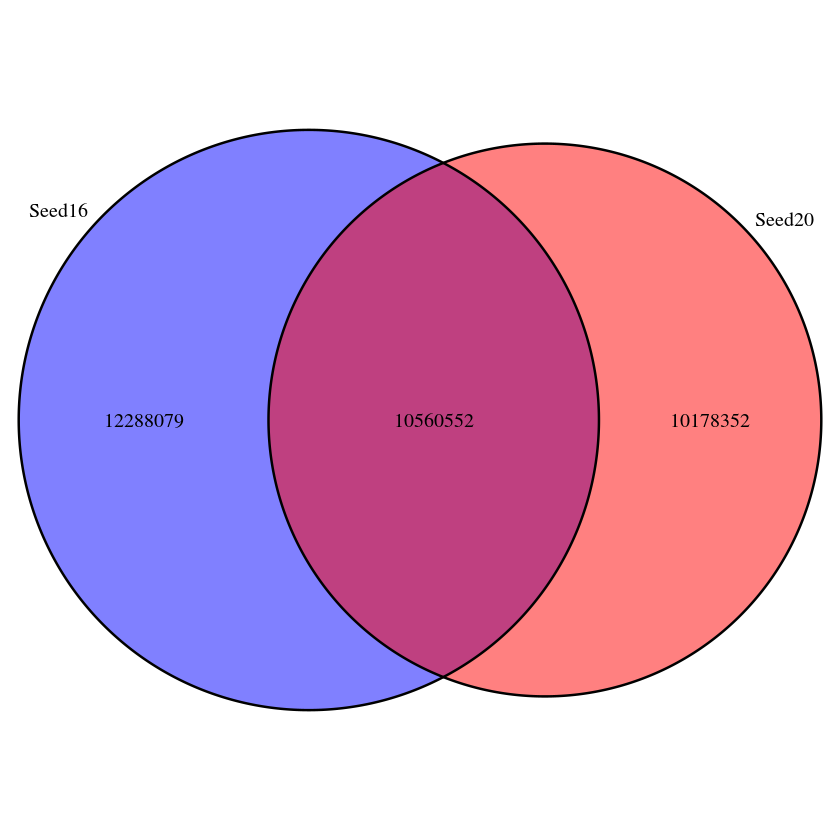

In [62]:
# Load the list
area.list <- readRDS("./Fig_1_list.RDS")

# Make a better looking venn diagram (save it to png)
png(filename = "Figure1.png")

venn.plot <- draw.pairwise.venn(area1 = area.list$area.1,
                                area2 = area.list$area.2,
                                cross.area = area.list$area.3,
                                category = c("Seed16","Seed20"),
                                fill = c("blue","red")#,
                                # ext.text = TRUE,
                                #cat.default.pos = "text" # Switch labels to inside??
                                )
dev.off()

grid::grid.draw(venn.plot)

*** Alternate approach: find things that do/don't have overlaps using GenomicRanges ***

We'll take the full list of footprints for each seed size and find the overlaps between them. Then we'll effectively take the set difference, finding how many things in each seed size don't overlap with the other one at all

In [4]:
# Load the data
load("/ssd/mrichard/data/all_lymph_footprints.Rdata")

In [5]:
# Make GRanges objects out of both:
gr.16 <- with(lymph.16, GRanges(seqnames=chrom, IRanges(start=start, end=end)))
gr.20 <- with(lymph.20, GRanges(seqnames=chrom, IRanges(start=start, end=end)))


In [53]:
# Find all overlaps between them
system.time(tbl.overlaps <- as.data.frame(findOverlaps(gr.16, gr.20, type="any")))
head(tbl.overlaps)

queryHits,subjectHits
2,1377485
2,1623876
2,11388946
2,21883234
3,8683721
3,19378581


In [56]:
nrow(lymph.16)

[1] 20738904

In [58]:
length(unique(tbl.overlaps$queryHits))

[1] 19096061

In [59]:
nrow(lymph.20)

[1] 22848631

In [60]:
length(unique(tbl.overlaps$subjectHits))

[1] 20590443

We can then figure out how many things DO NOT overlap in each set if we'd like; the basic idea is that ~95% of the sequences have at least 1 base of overlap. Note that it's hard to make a Venn diagram of this because the overlaps aren't 1:1, so the %'s wouldn't add up to 100%.

In any case, here's what happens if we require at least 5 bases of overlap instead:

In [64]:
system.time(tbl.overlaps.5 <- as.data.frame(findOverlaps(gr.16, gr.20, type="any",minoverlap = 5)))

   user  system elapsed 
 43.812   3.000  46.815 

We'll again compute the number of overlaps for each:

In [66]:
length(unique(tbl.overlaps.5$queryHits))

[1] 18895542

In [67]:
length(unique(tbl.overlaps.5$subjectHits))

[1] 20341970

Again, we're capturing like 95% of each set as being basically the same. So let's push it just a bit and require overlap of 10 bases:

In [68]:
system.time(tbl.overlaps.10 <- as.data.frame(findOverlaps(gr.16, gr.20, type="any",minoverlap = 10)))

   user  system elapsed 
 36.844   2.036  38.884 

In [69]:
length(unique(tbl.overlaps.10$queryHits));length(unique(tbl.overlaps.10$subjectHits))

[1] 18430380

[1] 19758660

Do it in a loop, going from 1->20 in min overlap

In [85]:
queries <- numeric(length = 30)
subjects <- numeric(length = 30)

for(i in 1:30){
    
    my.phrase <- sprintf("Working on overlap size %d",i)
    print(my.phrase)
    tbl <- as.data.frame(findOverlaps(gr.16,gr.20,type="any",minoverlap = i))
    queries[i] <- length(unique(tbl$queryHits))
    subjects[i] <- length(unique(tbl$subjectHits))
}

[1] "Working on overlap size 1"
[1] "Working on overlap size 2"
[1] "Working on overlap size 3"
[1] "Working on overlap size 4"
[1] "Working on overlap size 5"
[1] "Working on overlap size 6"
[1] "Working on overlap size 7"
[1] "Working on overlap size 8"
[1] "Working on overlap size 9"
[1] "Working on overlap size 10"
[1] "Working on overlap size 11"
[1] "Working on overlap size 12"
[1] "Working on overlap size 13"
[1] "Working on overlap size 14"
[1] "Working on overlap size 15"
[1] "Working on overlap size 16"
[1] "Working on overlap size 17"
[1] "Working on overlap size 18"
[1] "Working on overlap size 19"
[1] "Working on overlap size 20"
[1] "Working on overlap size 21"
[1] "Working on overlap size 22"
[1] "Working on overlap size 23"
[1] "Working on overlap size 24"
[1] "Working on overlap size 25"
[1] "Working on overlap size 26"
[1] "Working on overlap size 27"
[1] "Working on overlap size 28"
[1] "Working on overlap size 29"
[1] "Working on overlap size 30"


In [88]:
# Grab total entries from each
total.16 <- nrow(lymph.16)
total.20 <- nrow(lymph.20)

In [89]:
total.16; total.20

[1] 20738904

[1] 22848631

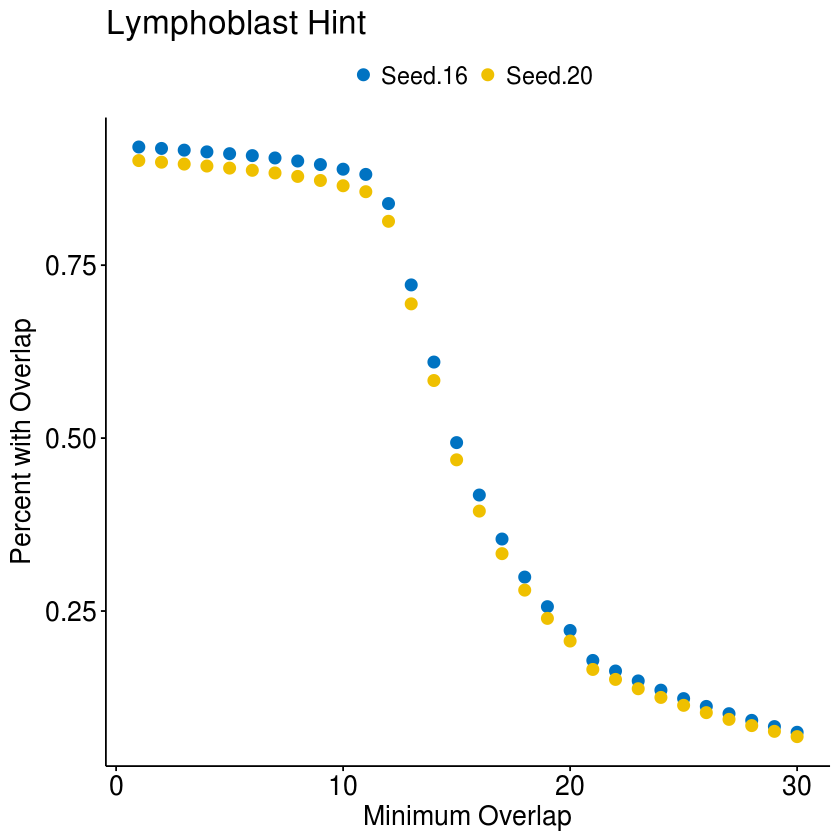

In [137]:
overlap.df <- data_frame(Overlap.Distance = 1:30,
                         Seed.16.hits = queries,
                         Seed.20.hits = subjects,
                         Seed.16 = Seed.16.hits/total.16,
                         Seed.20 = Seed.20.hits/total.20
                        )

overlap.df.long <- melt(overlap.df, 
                        id.vars = "Overlap.Distance", 
                        measure.vars = c("Seed.16","Seed.20"), 
                        variable.name = "Seed", 
                        value.name = "Percent")

sp <- ggscatter(data = overlap.df.long,
                x = "Overlap.Distance",
                y = "Percent",
                color = "Seed",
                palette = "jco",
                size = 3,
                xlab = "Minimum Overlap",
                ylab = "Percent with Overlap",
                title = "Lymphoblast Hint",
                legend.title = ""
               ) +
      font("xy.text", size = 16) + # Make axis tick labels bigger
      font("xylab", size = 16) + # Make axis labels bigger
      font("title", size = 20) +# Make title bigger
      font("legend.text", size = 14) # Make legend text bigger

sp

In [138]:
# Save the figure
png("./Figure2.png")
sp
dev.off()

png 
  2

### Complimentary figures (2.1, 2.2)

Now we want to pick out a particular threshold and decide how many things overlap at that point. This has directionality, so let's map A to B, then B to A (16 to 20 and 20 to 16). We'll use minOverlap = 15 for this

In [143]:
# Grab the stats for 15
only.15 <- filter(overlap.df, Overlap.Distance == 15)
only.15

Overlap.Distance,Seed.16.hits,Seed.20.hits,Seed.16,Seed.20
15,10234167,10706762,0.4934768,0.4685953


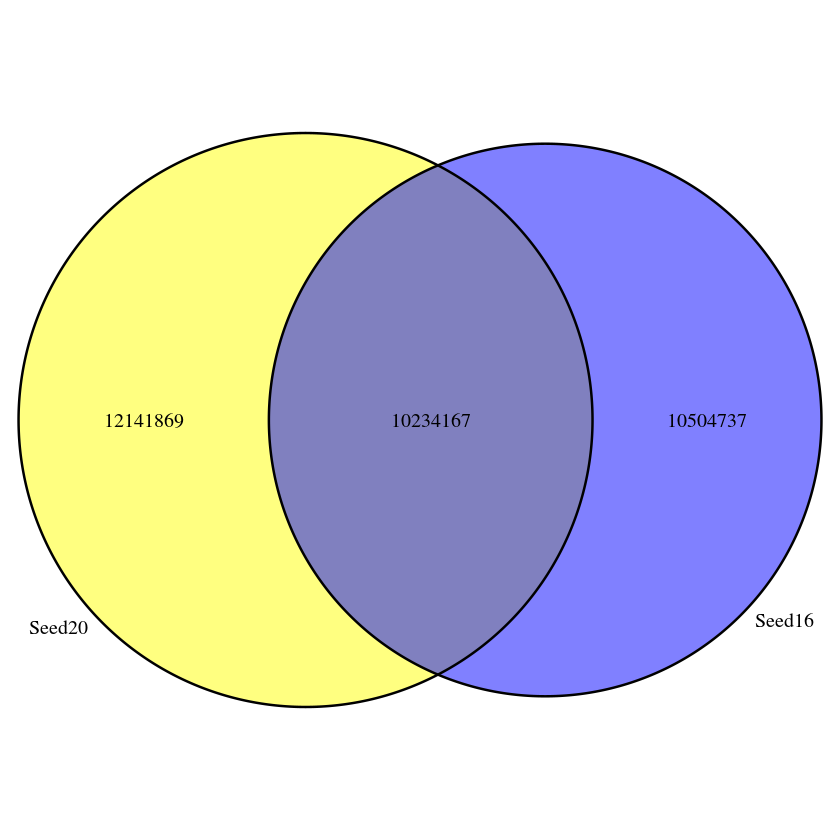

In [151]:
# Plot with 16 as reference
# Note: we have to adjust the other total to reflect;
# B_adj = B_not + A_in
# B_not = B_tot - B_in
# Thus: B_adj = B_tot + A_in - B_in

adj.20 <- total.20 + only.15$Seed.16.hits - only.15$Seed.20.hits

png("./Figure2.1.png")
venn.plot <- draw.pairwise.venn(area1 = total.16,
                                area2 = adj.20,
                                cross.area = only.15$Seed.16.hits,
                                category = c("Seed16","Seed20"),
                                fill = c("blue","yellow")#,
                                # ext.text = TRUE,
                                #cat.default.pos = "text" # Switch labels to inside??
                                )
dev.off()
grid::grid.draw(venn.plot)

In [185]:
# Plot with 20 as reference
adj.16 <- total.16 + only.15$Seed.20.hits - only.15$Seed.16.hits
png("./Figure2.2.png")
venn.plot <- draw.pairwise.venn(area1 = round(adj.16/1e6,1),
                                area2 = round(total.20/1e6,1),
                                cross.area = round(only.15$Seed.20.hits/1e6,1),
                                category = c("",""),
                                fill = c("blue","yellow"),
                                cat.cex = c(1.3,1.3), # Change size of labels
                                cex = c(2,2,2) # Change size of numbers inside#,
                                # ext.text = TRUE,
                                #cat.default.pos = "text" # Switch labels to inside??
                                )
dev.off()

png 
  2

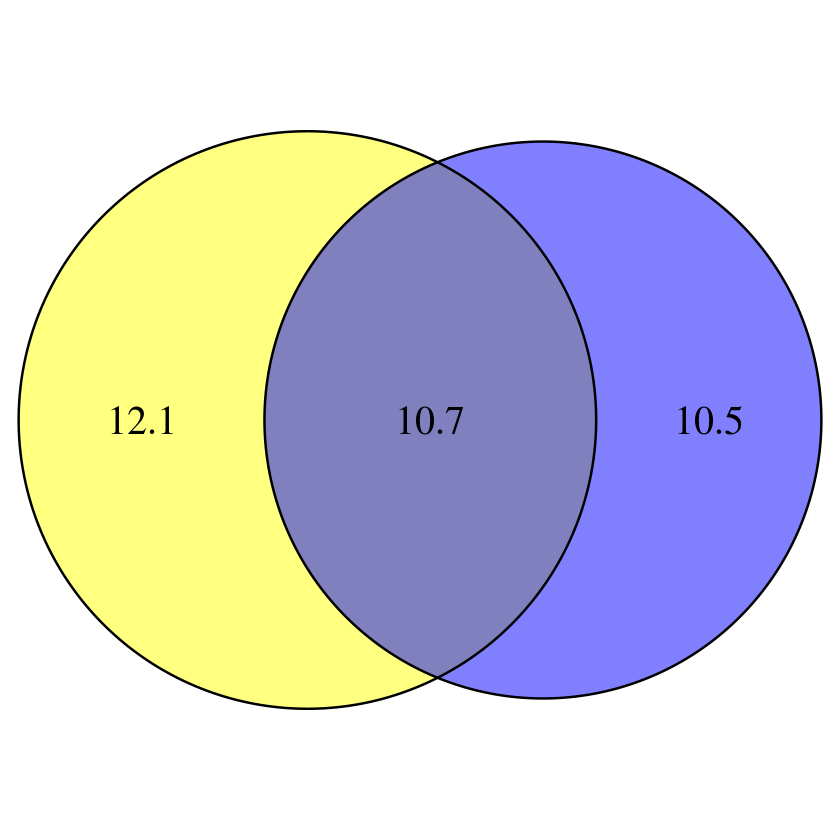

In [186]:
grid::grid.draw(venn.plot)

### Sub-Figure exploration: Do it as %

Note: this takes a little while (I'm guessing ~10-15 min for the pintersect step)

In [6]:
# Find the table of overlaps
tbl.overlaps <- findOverlaps(gr.16, gr.20, type="any")

In [8]:
# Find the intersection; this gives us the length of the range for each overlap!!!
overlaps <- pintersect(gr.16[queryHits(tbl.overlaps)], gr.20[subjectHits(tbl.overlaps)])

In [48]:
# Create the percent overlap for each by dividing overlap width by the subject width
percentOverlap.20 <- width(overlaps) / width(gr.20[subjectHits(tbl.overlaps)])
percentOverlap.16 <- width(overlaps) / width(gr.16[queryHits(tbl.overlaps)])

In [49]:
head(percentOverlap.20)
head(percentOverlap.16)

[1] 0.9000000 0.7692308 0.7500000 0.8461538 0.6875000 0.5416667

[1] 0.9473684 0.5263158 0.7894737 0.5789474 0.4230769 1.0000000

*** WHAT DO WE DO WITH THIS NOW?????? ***

In [51]:
# Create a function that finds % of subject and target overlapping for a series of points, then returns a DF

createOverlapDF <- function(tbl.overlaps, percentOverlap.16, 
                            percentOverlap.20, intervals = (1:20)/20){
    
    # Create a function to find % of subject and query overlap above a threshold
    findSubjectsAndQueries <- function(tbl.overlaps, percentOverlap.16, 
                                       percentOverlap.20, threshold){
        # Find the hits over the threshold
        hits.16 <- tbl.overlaps[percentOverlap.16 >= threshold]
        queries <- length(unique(queryHits(hits.16)))
        hits.20 <- tbl.overlaps[percentOverlap.20 >= threshold]
        subjects <- length(unique(subjectHits(hits.20)))
        return(data.frame(Threshold = threshold, Queries = queries, Subjects = subjects))
        }
    
    # Run it as a multi-core process
    register(MulticoreParam(workers = 30, stop.on.error = TRUE, log = FALSE), default = TRUE)
    
    # Run the function for all invervals
    all.overlaps <- bplapply(intervals, findSubjectsAndQueries, 
                             tbl.overlaps = tbl.overlaps, 
                             percentOverlap.16 = percentOverlap.16,
                             percentOverlap.20 = percentOverlap.20
                            )
    
    # Combine the data frames and return
    full.df <- bind_rows(all.overlaps)
    
    return(full.df)
}

In [53]:
system.time(test.fxn <- createOverlapDF(tbl.overlaps, percentOverlap.16,
                                        percentOverlap.20, intervals = (0:100)/100))

   user  system elapsed 
  8.928  88.768 719.142 

In [38]:
# Grab the number of rows in each lymph dataset (again)
total.16 <- nrow(lymph.16)
total.20 <- nrow(lymph.20)

Same plotting function as above, but for percent now

In [242]:
# Make a plotting palette
my.palette <- c("lightblue", "navyblue")

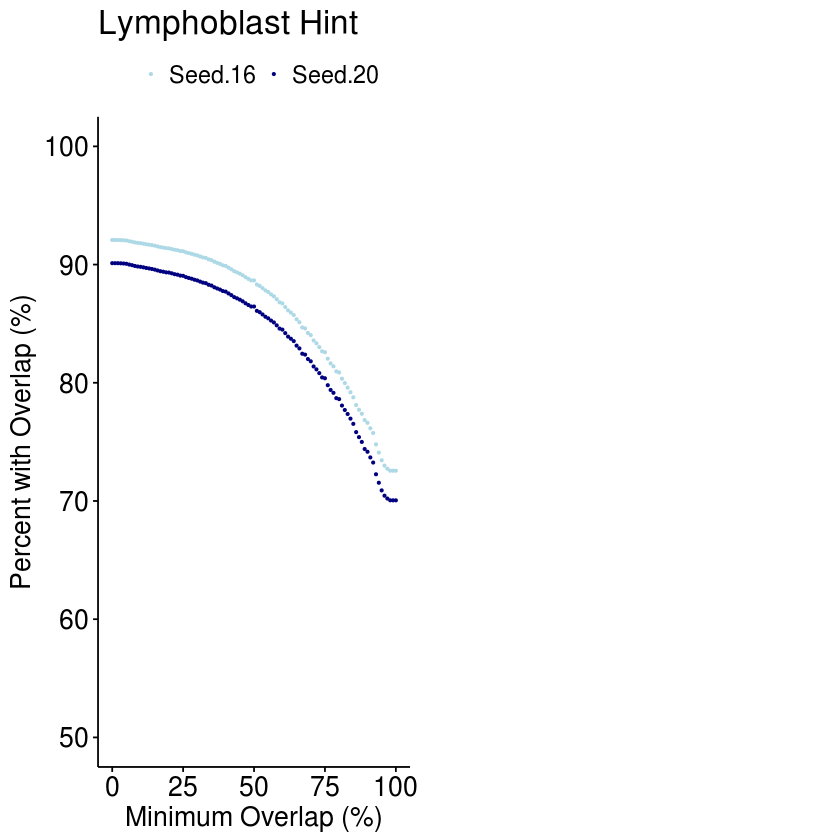

In [254]:
test.fxn %>% transmute(Seed.16 = Queries/total.16,
                       Seed.20 = Subjects/total.20,
                       Thresh.Percent = Threshold * 100
                     ) -> overlap.df

overlap.df.long <- melt(overlap.df, 
                        id.vars = "Thresh.Percent", 
                        measure.vars = c("Seed.16","Seed.20"), 
                        variable.name = "Seed", 
                        value.name = "Percent")

overlap.df.long$Percent <- overlap.df.long$Percent * 100

sp <- ggscatter(data = overlap.df.long,
                x = "Thresh.Percent",
                y = "Percent",
                color = "Seed",
                palette = my.palette,
                size = 0.5,
                xlab = "Minimum Overlap (%)",
                ylab = "Percent with Overlap (%)",
                title = "Lymphoblast Hint",
                legend.title = "",                
               ) +
      font("xy.text", size = 16) + # Make axis tick labels bigger
      font("xylab", size = 16) + # Make axis labels bigger
      font("title", size = 20) +# Make title bigger
      font("legend.text", size = 14) # Make legend text bigger
      

ggarrange(ggpar(sp, ylim = c(50,100)), ncol = 2, align = "h") # Change y to 0-100sp


In [255]:
# Save the figure
ggarrange(ggpar(sp, ylim = c(50,100)), ncol = 2, align = "h") %>%
    ggexport(filename = "./minOverlap.png")

file saved to ./minOverlap.png


In [60]:
# Print out the table
#stable.p <- ggtexttable(overlap.df, rows = NULL, 
#                        theme = ttheme("mOrange"))
#stable.p
head(overlap.df)

Seed.16,Seed.20,Thresh.Percent
0.9207845,0.9011675,0
0.9207845,0.9011675,1
0.9207845,0.9011675,2
0.9206847,0.9010520,3
0.9205513,0.9008900,4
0.9203454,0.9006614,5


## Figure 4: Table showing the number of footprints in each database (also functions as a list of all completed databases).

This is a way of grabbing the approximate number of rows; it's probably sufficiently close and it's super fast, as opposed to getting the exact count. For now, I'll make a bar chart with a table integrated into it.



In [2]:
# Function for finding # rows in the hits table given a db name
findApproxHits <- function(dbname, port){
    
    # Specify the connection
    db <- dbConnect(PostgreSQL(),
                    user = 'trena',
                    password = 'trena',
                    dbname = dbname,
                    host = 'localhost',
                    port = port
                   )
    numHits <- dbGetQuery(db, "select reltuples from pg_class where relname = 'hits'")[1,1]
    dbDisconnect(db)
    return(numHits)
}

# Function for getting our specific databases
findFootprintDBs <- function(port){
    
    # Specify the connection
    db <- dbConnect(PostgreSQL(),
                    user = 'trena',
                    password = 'trena',
                    dbname = 'postgres',
                    host = 'localhost',
                    port = port
                   )
    # Get all databases, then slim it down with a grep
    existing.databases <- dbGetQuery(db, "select datname from pg_database")[,1]
    important.dbs <- grep("(hint|wellington)_(20|16)",existing.databases, value = TRUE)
    
    return(important.dbs)    
}

In [3]:
# Generate db lists for both database sources
# First, normal port (5432)
db_list_1 <- findFootprintDBs(port = 5432)
# Next, secondary port (5433)
db_list_2 <- findFootprintDBs(port = 5433)

In [4]:
# Note: could parallelize via BiocParallel if needed, but I doubt it is
hits.list.1 <- sapply(db_list_1, findApproxHits, port = 5432)
hits.list.2 <- sapply(db_list_2, findApproxHits, port = 5433)

hits.list <- c(hits.list.1, hits.list.2)
hits.table <- data_frame(Name = names(hits.list),
                         Hits = hits.list, #format(hits.list,scientific = TRUE, digits = 3),
                         Hits.thousand = hits.list/1000,
                         Hits.million = hits.list/1e6,
                         Tissue = gsub("(.*)_(hint|wellington).*","\\1",Name),
                         Method = gsub(".*_(hint|wellington).*","\\1",Name)
                        )
hits.table <- hits.table %>% arrange(Method,Tissue, Hits)

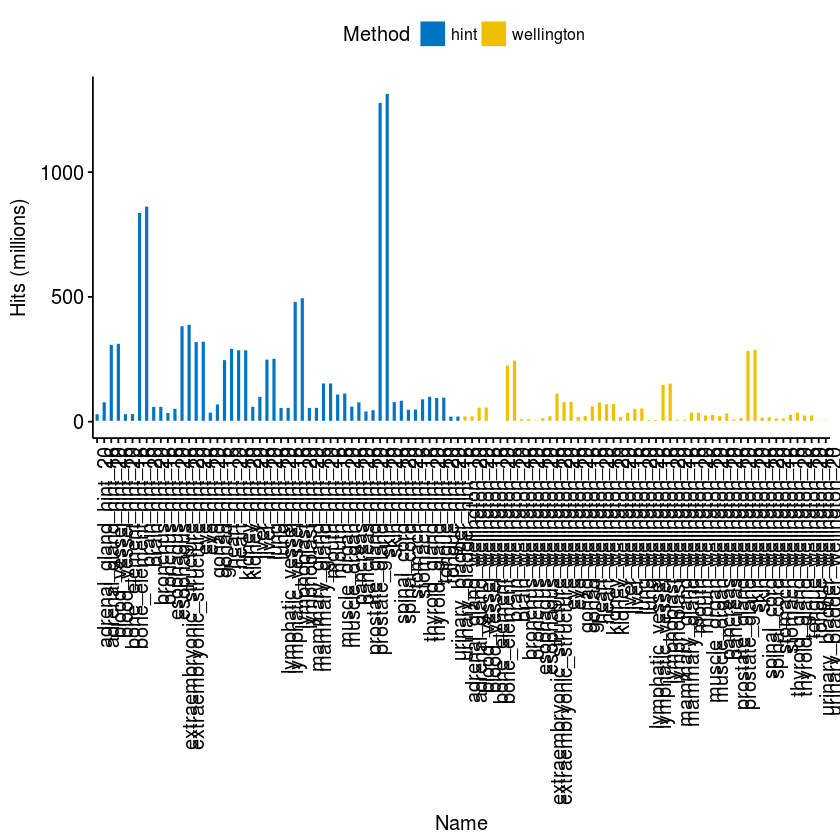

In [6]:
# Nice plotting; see http://www.sthda.com/english/wiki/ggplot2-easy-way-to-mix-multiple-graphs-on-the-same-page
# Color palettes: https://cran.r-project.org/web/packages/ggsci/vignettes/ggsci.html
bp <- hits.table %>% ggbarplot(x = "Name",
                               y = "Hits.million",
                               ylab = "Hits (millions)",
                               color = "white",
                               palette = "jco",
                               fill = "Method",
                               x.text.angle = 90#,
                               #sort.val = "asc"
                              )
tbl <- hits.table %>% select(Name, Hits) %>% 
        arrange(desc(Hits)) %>%
        ggtexttable(rows = NULL,
                    theme = ttheme("mViolet")
                    )
bp

In [7]:
# Two separate graphs
big.tissues <- hits.table %>% filter(Tissue %in% c("skin","brain","lymphoblast"), Method == "hint")
small.tissues <- hits.table %>% setdiff(big.tissues) %>% filter(Method == "hint")

bp.big <- big.tissues %>% ggbarplot(x = "Tissue",
                                    y = "Hits.million",
                                    ylab = "Hits (millions)",
                                    color = "white",
                                    palette = "jco",
                                    fill = "Method",
                                    x.text.angle = 90,
                                    #sort.val = "asc"
                                    )
bp.small <- small.tissues %>% ggbarplot(x = "Tissue",
                                        y = "Hits.million",
                                        ylab = "Hits (millions)",
                                        color = "white",
                                        palette = "jco",
                                        fill = "Method",
                                        x.text.angle = 90#,
                                        #sort.val = "asc"
                                        )

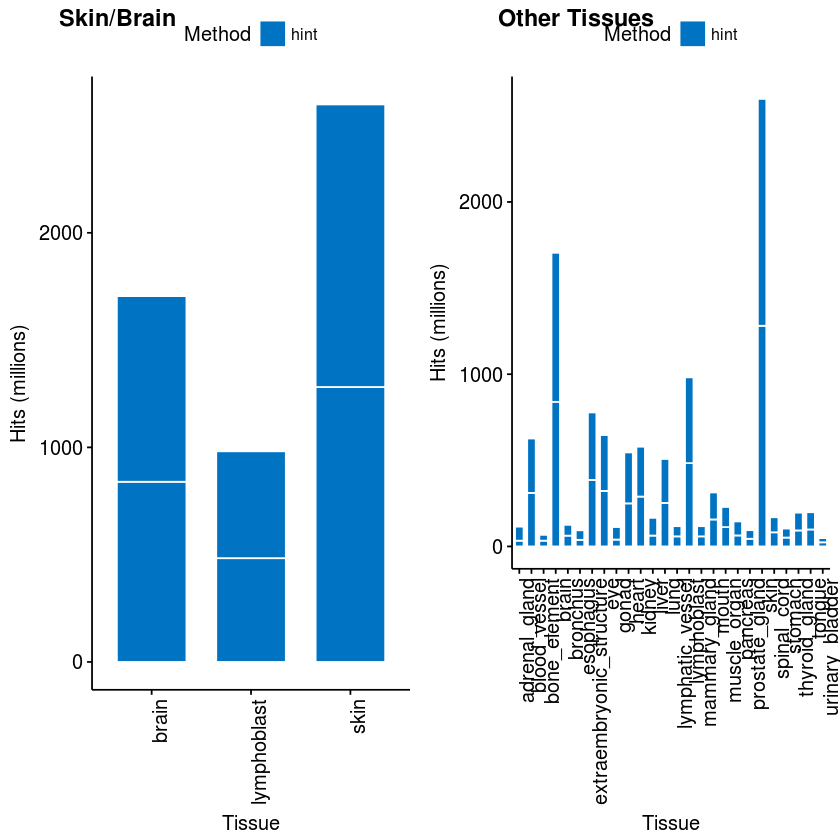

In [8]:
ggarrange(bp.big, bp.small, 
          labels = c("Skin/Brain", "Other Tissues"),
          ncol = 2, nrow = 1)

In [68]:
# Export the above plot for now

fig4 <- ggarrange(bp.big, bp.small, 
          labels = c("Skin/Brain", "Other Tissues"),
          ncol = 2, nrow = 1)
ggexport(fig4, filename = "Figure4.png")

file saved to Figure4.png


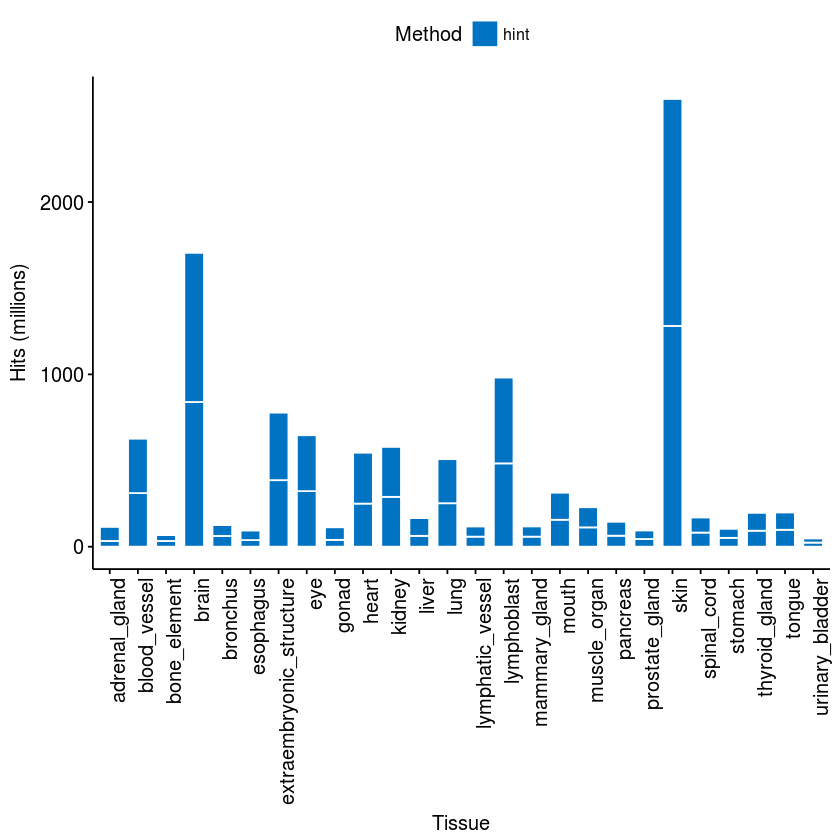

In [10]:
bp.small

More important operation: stack all the UNIQUE entries together. Find the unique ones using GR objects, with min overlap = 15 bp. Order of operations here:

* Grab both 16 and 20 seed databases for a tissue type
* Convert both into GR objects
* Run the overlap to find the # of overlaps
* Use the overlaps to take just unique hits

In [9]:
nrow(hits.table)

[1] 104

## Figure 5: Visualization of brain footprint growth, with total added footprints AND new footprints with each footprint file

In [24]:
# Repeat function to read footprints (in case Fig.1 hasn't been run yet)
readFootprintTable <- function(fp.path){
    tbl <- read.table(fp.path, sep = "\t", as.is = TRUE)
    colnames(tbl) <- c("chrom", "start", "end", "name", "score", "strand")
    return(tbl)
}

In [25]:
# Using parallelization, read all the footprint files at once and time it
register(MulticoreParam(workers = 29, stop.on.error = TRUE, log = TRUE), default = TRUE)

all.paths <- list.files("./footprints/brain_hint_20/")
all.paths <- file.path("./footprints/brain_hint_20/",all.paths)

system.time(all.fp.list <- bptry(bplapply(all.paths,
                              readFootprintTable
                              )))


############### LOG OUTPUT ###############
Task: 4
Node: 4
Timestamp: 2017-08-21 14:59:03
Success: TRUE
Task duration:
   user  system elapsed 
  1.056   0.180   1.236 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   3923767  209.6   21408909 1143.4  52267848 2791.5
Vcells 238824595 1822.1  643373021 4908.6 640658421 4887.9
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 3
Node: 3
Timestamp: 2017-08-21 14:59:06
Success: TRUE
Task duration:
   user  system elapsed 
  1.892   0.396   2.292 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   4290107  229.2   17127127  914.7  52267848 2791.5
Vcells 242147907 1847.5  643373021 4908.6 640658421 4887.9
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 8
Node: 8
Timestamp: 2017-08-21 14:59:08
Success: TRUE
Task duration:
   user  system elapsed 
  3.896   0.828   4.724 
Memory used:
            used   (Mb) gc trigg

############### LOG OUTPUT ###############
Task: 22
Node: 22
Timestamp: 2017-08-21 15:00:40
Success: TRUE
Task duration:
   user  system elapsed 
  6.856   1.224   8.080 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  36312574 1939.4   61886222 3305.1  52267848 2791.5
Vcells 552705823 4216.9  926633150 7069.7 640658421 4887.9
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 23
Node: 23
Timestamp: 2017-08-21 15:00:48
Success: TRUE
Task duration:
   user  system elapsed 
  9.168   1.312  10.547 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  38077614 2033.6   61886222 3305.1  52267848 2791.5
Vcells 569595759 4345.7  926633150 7069.7 640658421 4887.9
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 24
Node: 24
Timestamp: 2017-08-21 15:00:56
Success: TRUE
Task duration:
   user  system elapsed 
 22.500   2.292  24.856 
Memory used:
            used   (Mb) gc

   user  system elapsed 
152.352  12.912 184.606 

In [26]:
class(all.fp.list)

[1] "list"

In [27]:
# The object is quite large...
object.size(all.fp.list)/(1024^2)

5418.5 bytes

In [28]:
head(all.fp.list[[1]])

chrom,start,end,name,score,strand,NA
chr1,66103,66123,chr1:66103-66123,10,.,NA
chr1,66162,66174,chr1:66162-66174,35,.,NA
chr1,66172,66183,chr1:66172-66183,34,.,NA
chr1,66195,66211,chr1:66195-66211,50,.,NA
chr1,66215,66232,chr1:66215-66232,57,.,NA
chr1,66233,66252,chr1:66233-66252,45,.,NA


In [29]:
# Take the first 3 columns only
system.time(reduced.fp.list <- lapply(all.fp.list,select,1:3))

############### LOG OUTPUT ###############
Task: 1
Node: 1
Timestamp: 2017-08-21 15:04:15
Success: TRUE
Task duration:
   user  system elapsed 
  0.004   0.000   0.005 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  48455463 2587.9   74303466 3968.3  52267848 2791.5
Vcells 674990278 5149.8 1112039780 8484.2 960549063 7328.5
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 2
Node: 2
Timestamp: 2017-08-21 15:04:35
Success: TRUE
Task duration:
   user  system elapsed 
  0.004   0.000   0.005 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  48455503 2587.9   74303466 3968.3  52267848 2791.5
Vcells 678232127 5174.6 1112039780 8484.2 960549063 7328.5
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 3
Node: 3
Timestamp: 2017-08-21 15:04:47
Success: TRUE
Task duration:
   user  system elapsed 
  0.004   0.000   0.005 
Memory used:
            used   (Mb) gc trigg

############### LOG OUTPUT ###############
Task: 22
Node: 22
Timestamp: 2017-08-21 15:07:25
Success: TRUE
Task duration:
   user  system elapsed 
  0.008   0.000   0.006 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  48456204 2587.9   74303466 3968.3  52267848 2791.5
Vcells 743624224 5673.5 1112039780 8484.2 960549063 7328.5
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 23
Node: 23
Timestamp: 2017-08-21 15:07:33
Success: TRUE
Task duration:
   user  system elapsed 
  0.008   0.000   0.008 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  48456239 2587.9   74303466 3968.3  52267848 2791.5
Vcells 747556234 5703.5 1112039780 8484.2 960549063 7328.5
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 24
Node: 24
Timestamp: 2017-08-21 15:07:41
Success: TRUE
Task duration:
   user  system elapsed 
  0.008   0.000   0.006 
Memory used:
            used   (Mb) gc

   user  system elapsed 
257.416  21.620 394.251 

In [30]:
# Object is now much smaller
object.size(reduced.fp.list)/(1024^2)

774.1 bytes

In [31]:
# First easy statistic: how many rows are in each DF (how many FPs?)
total.fps.added <- unlist(lapply(reduced.fp.list,nrow))

In [32]:
# Addition: want these in size order, so do that:
my.order <- order(total.fps.added, decreasing=TRUE)

reduced.fp.list <- reduced.fp.list[my.order]

# Re-do the statistic
total.fps.added <- unlist(lapply(reduced.fp.list,nrow))
total.fps.added

[1] 3246144 2844199 2781802 2607424 2554678 2442669 2422651 2264222 2055198
[10] 1965971 1944207 1916970 1908625 1696582 1664324 1620888 1593480 1573398
[19] 1563716 1445364 1394970 1365399 1313358 1293220  953084  859228  832978
[28]  371609  232524

In [33]:
cumsum(total.fps.added)

[1]  3246144  6090343  8872145 11479569 14034247 16476916 18899567 21163789
 [9] 23218987 25184958 27129165 29046135 30954760 32651342 34315666 35936554
[17] 37530034 39103432 40667148 42112512 43507482 44872881 46186239 47479459
[25] 48432543 49291771 50124749 50496358 50728882

In [34]:
# Now we need to figure out how many unique rows we've added for each

# Step 1: Make a function that, given an index, combines all dfs up to that index
findUniqueRows <- function(idx, db.list) {
    
    # Create a sub-list 
    sub.df <- db.list[1:idx]
    
    # Take the union and find the rows
    nrow(reduce(sub.df,union))    
}

In [35]:
# Step 2: Run that function with a list of indices
system.time(total.unique.fps <- bplapply(1:length(reduced.fp.list),findUniqueRows,reduced.fp.list))

############### LOG OUTPUT ###############
Task: 1
Node: 1
Timestamp: 2017-08-21 15:13:33
Success: TRUE
Task duration:
   user  system elapsed 
      0       0       0 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  48455873 2587.9   74303466 3968.3  52267848 2791.5
Vcells 770885268 5881.4 1112039780 8484.2 960549063 7328.5
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 2
Node: 2
Timestamp: 2017-08-21 15:14:01
Success: TRUE
Task duration:
   user  system elapsed 
  5.292   0.816   6.108 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  48455904 2587.9   74303466 3968.3  52267848 2791.5
Vcells 770885332 5881.4 1112039780 8484.2 960549063 7328.5
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 3
Node: 3
Timestamp: 2017-08-21 15:14:14
Success: TRUE
Task duration:
   user  system elapsed 
 13.668   0.980  14.650 
Memory used:
            used   (Mb) gc trigg

############### LOG OUTPUT ###############
Task: 21
Node: 21
Timestamp: 2017-08-21 15:20:07
Success: TRUE
Task duration:
   user  system elapsed 
345.628  84.764 430.428 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  48456425 2587.9   74303466 3968.3  52267848 2791.5
Vcells 770886493 5881.4 1112039780 8484.2 960549063 7328.5
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 24
Node: 24
Timestamp: 2017-08-21 15:20:20
Success: TRUE
Task duration:
   user  system elapsed 
383.568  40.660 424.274 
Memory used:
            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells  48456451 2587.9   74303466 3968.3  52267848 2791.5
Vcells 770886551 5881.4 1112039780 8484.2 960549063 7328.5
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 22
Node: 22
Timestamp: 2017-08-21 15:20:44
Success: TRUE
Task duration:
   user  system elapsed 
371.616  89.248 460.917 
Memory used:
            used   (Mb) gc

   user  system elapsed 
394.128  47.584 935.592 

In [56]:
# Now combine the 2 into one figure

all.totals <- data_frame(Idx = 1:length(reduced.fp.list),
                         Total = cumsum(total.fps.added),
                         Unique = unlist(total.unique.fps),
                         Hits = total.fps.added
                        )

# First attempt: put them on the same plot
all.totals.long <- melt(all.totals,
                        id.vars = "Idx",
                        variable.name = "Sum.Method"
                       )
saveRDS(all.totals.long, "Fig_5.RDS")
head(all.totals.long)

Idx,Sum.Method,value
1,Total,3246144
2,Total,6090343
3,Total,8872145
4,Total,11479569
5,Total,14034247
6,Total,16476916


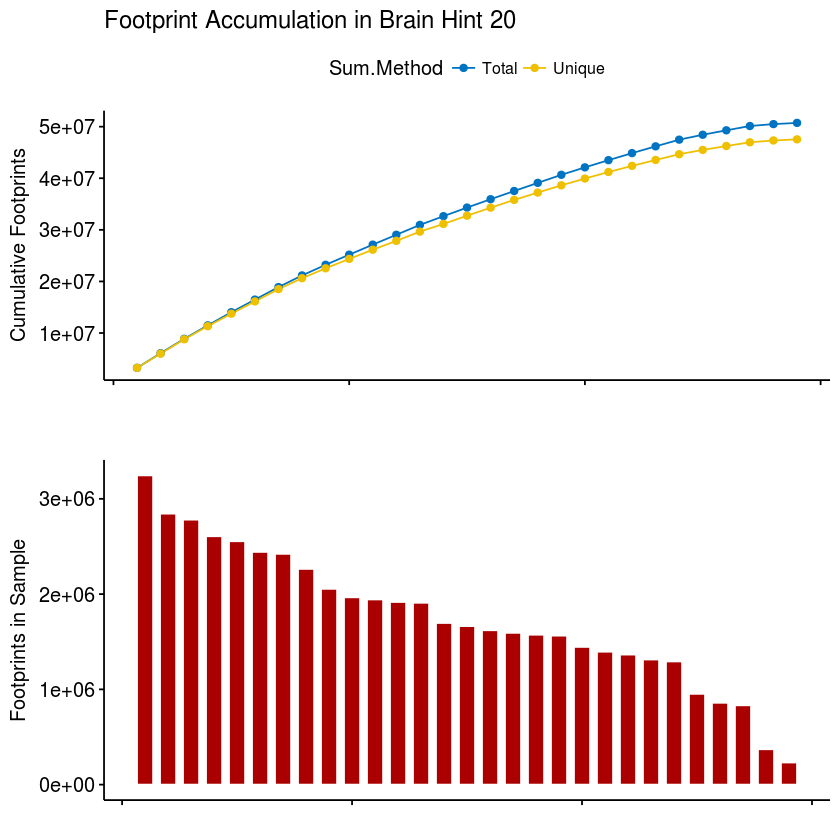

In [114]:
# Final idea: put total and unique on a line, put footprints on a bar below it

lp <- all.totals.long %>% filter(Sum.Method %in% c("Total","Unique")) %>%
   ggline(x = "Idx",
          y = "value",
          xlab = "",
          ylab = "Cumulative Footprints",
          color = "Sum.Method",
          palette = "jco",
          main = "Footprint Accumulation in Brain Hint 20"
         ) + rremove("x.text")

bp <- all.totals.long %>% filter(Sum.Method == "Hits") %>%
   ggbarplot(x = "Idx",
             y = "value",
             xlab = "",
             ylab = "Footprints in Sample",
             color = "white",
             fill = "#AA0000",
             main = ""
            ) + rremove("x.text")

ggarrange(lp, bp, nrow = 2, align = "v")

In [67]:
fig5 <- ggarrange(lp, bp, nrow = 2, align = "v")
ggexport(fig5, filename = "Figure5.png")


file saved to Figure5.png


In [62]:
# Sequentially aggregate the footprints

# 1. Locate all footprints for brain_hint_20
all.paths <- compileFootprintPaths("brain")
hint.20.paths <- grep("brain_hint_20", all.paths, value = TRUE)
length(hint.20.paths)

[1] 29

In [63]:
# 2. In parallel, read them in
register(MulticoreParam(workers = 29, stop.on.error = TRUE, log = FALSE), default = TRUE)
system.time(hint.20.dfs <- bplapply(hint.20.paths, readFootprintTable))

############### LOG OUTPUT ###############
Task: 4
Node: 4
Timestamp: 2017-10-24 13:55:17
Success: TRUE
Task duration:
   user  system elapsed 
  1.168   0.036   1.204 
Memory used:
             used   (Mb) gc trigger    (Mb)   max used    (Mb)
Ncells    2302296  123.0    3886542   207.6    3205452   171.2
Vcells 1231964964 9399.2 2026124388 15458.2 2025610838 15454.2
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 3
Node: 3
Timestamp: 2017-10-24 13:55:18
Success: TRUE
Task duration:
   user  system elapsed 
  1.932   0.076   2.011 
Memory used:
             used   (Mb) gc trigger    (Mb)   max used    (Mb)
Ncells    2669377  142.6    4703850   251.3    3205452   171.2
Vcells 1235366603 9425.1 2026124388 15458.2 2025610838 15454.2
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 18
Node: 18
Timestamp: 2017-10-24 13:55:24
Success: TRUE
Task duration:
   user  system elapsed 
  6.912   0.192   7.108 
Memory used:
      

############### LOG OUTPUT ###############
Task: 21
Node: 21
Timestamp: 2017-10-24 13:56:56
Success: TRUE
Task duration:
   user  system elapsed 
 14.084   1.988  16.078 
Memory used:
             used    (Mb) gc trigger    (Mb)   max used    (Mb)
Ncells   37008588  1976.5   62761417  3351.9   37025963  1977.4
Vcells 1567759524 11961.1 2431429265 18550.4 2025610838 15454.2
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 22
Node: 22
Timestamp: 2017-10-24 13:57:03
Success: TRUE
Task duration:
   user  system elapsed 
 14.960   0.320  15.283 
Memory used:
             used    (Mb) gc trigger    (Mb)   max used    (Mb)
Ncells   38319446  2046.5   62761417  3351.9   38336824  2047.5
Vcells 1579507019 12050.7 2431429265 18550.4 2025610838 15454.2
Log messages:
stderr and stdout:

############### LOG OUTPUT ###############
Task: 23
Node: 23
Timestamp: 2017-10-24 13:57:10
Success: TRUE
Task duration:
   user  system elapsed 
 20.384   1.756  22.208 
Memory us

   user  system elapsed 
152.992   7.032 170.323 

In [64]:
head(hint.20.dfs[[1]])

chrom,start,end,name,score,strand
chr1,66103,66123,chr1:66103-66123,10,.
chr1,66162,66174,chr1:66162-66174,35,.
chr1,66172,66183,chr1:66172-66183,34,.
chr1,66195,66211,chr1:66195-66211,50,.
chr1,66215,66232,chr1:66215-66232,57,.
chr1,66233,66252,chr1:66233-66252,45,.


In [66]:
# 3. Sort the list by number of rows

# First take only the first 3 columns
reduced.fp.list <- lapply(hint.20.dfs,select,1:3)

# First easy statistic: how many rows are in each DF (how many FPs?)
total.fps.added <- unlist(lapply(hint.20.dfs,nrow))
my.order <- order(total.fps.added, decreasing=TRUE)
reduced.fp.list <- reduced.fp.list[my.order]

# Re-do the statistic to get total fps for each file
total.fps.added <- unlist(lapply(reduced.fp.list,nrow))
total.fps.added

[1] 3246144 2844199 2781802 2607424 2554678 2442669 2422651 2264222 2055198
[10] 1965971 1944207 1916970 1908625 1696582 1664324 1620888 1593480 1573398
[19] 1563716 1445364 1394970 1365399 1313358 1293220  953084  859228  832978
[28]  371609  232524

In [70]:
str(reduced.fp.list[1:1])

List of 1
 $ :'data.frame':	3246144 obs. of  3 variables:
  ..$ chrom: chr [1:3246144] "chr1" "chr1" "chr1" "chr1" ...
  ..$ start: int [1:3246144] 1000089 10001007 10001025 10001050 10001066 10001086 10001095 10001140 10001162 10001181 ...
  ..$ end  : int [1:3246144] 1000101 10001021 10001046 10001061 10001080 10001100 10001109 10001154 10001176 10001195 ...


In [74]:
# 4. Do it like this:

# Initiate the thing of widths
all.widths <- numeric(length = length(reduced.fp.list))

for (i in 1:length(reduced.fp.list)){
    # 1. Bite off a chunk of the list of data frames
    sub.list <- reduced.fp.list[1:i]

    # 2. Feed that chunk into the footprintToGR function
    sub.gr <- footprintsToGenomicRange(sub.list)

    # 3. Reduce it and find the sum of widths to get total coverage
    reduced.sub.gr <- GenomicRanges::reduce(sub.gr)
    total.bp <- sum(as.numeric(width(reduced.sub.gr)))
    
    # Add that to the width list
    all.widths[i] <- total.bp
}

In [80]:
# Convert all the things in a list genomic ranges
convertDFtoGR <- function(fp.df){
    my.gr <- with(fp.df, GRanges(seqnames=chrom, IRanges(start=start, end=end)))
    return(my.gr)
}

In [85]:
system.time(all.grs <- lapply(reduced.fp.list, convertDFtoGR))

   user  system elapsed 
  1.856   0.096   1.953 

In [96]:
length(purrr::reduce(all.grs[1], c))
class(purrr::reduce(all.grs[1], c))

[1] 3246144

[1] "GRanges"
attr(,"package")
[1] "GenomicRanges"

In [91]:
blah <- purrr::reduce(all.grs[1:2],c)
length(blah)

[1] 6090343

In [98]:
# Better plan: wrap it in a function, then do parallel evaluation
findChunkCoverage <- function(i, gr.list){
    
    # 1. Bite off a chunk
    sub.gr <- purrr::reduce(gr.list[1:i], c)

    # 2. Reduce it and find the sum of widths to get total coverage
    reduced.sub.gr <- GenomicRanges::reduce(sub.gr)
    total.bp <- sum(as.numeric(width(reduced.sub.gr)))
    
    # Return the total bp
    return(total.bp)
}

In [101]:
# Find the widths this way
register(MulticoreParam(workers = 29, stop.on.error = TRUE, log = FALSE), default = TRUE)
system.time(all.widths <- unlist(bplapply(1:29, findChunkCoverage, all.grs)))

   user  system elapsed 
  0.648   9.848 303.619 

In [102]:
all.widths

[1]  57192025  83808461 144917388 174581623 193086656 218168847 244173765
 [8] 258144976 266931810 277008692 284269238 290132283 300100201 303951815
[15] 311492306 322566359 328689683 334637891 337512953 340390800 343660911
[22] 347987025 349598178 353189047 353991797 355942117 356692283 358382828
[29] 359742343

In [106]:
final.df <- data_frame(Idx = 1:length(reduced.fp.list),
                       Total = cumsum(total.fps.added),
                       Coverage = all.widths,
                       Percent.Coverage = 100*all.widths/3253848404,
                       Hits = total.fps.added
                      )
#final.df.long <- melt(final.df,
#                        id.vars = "Idx",
#                       variable.name = "Sum.Method"
#                       )

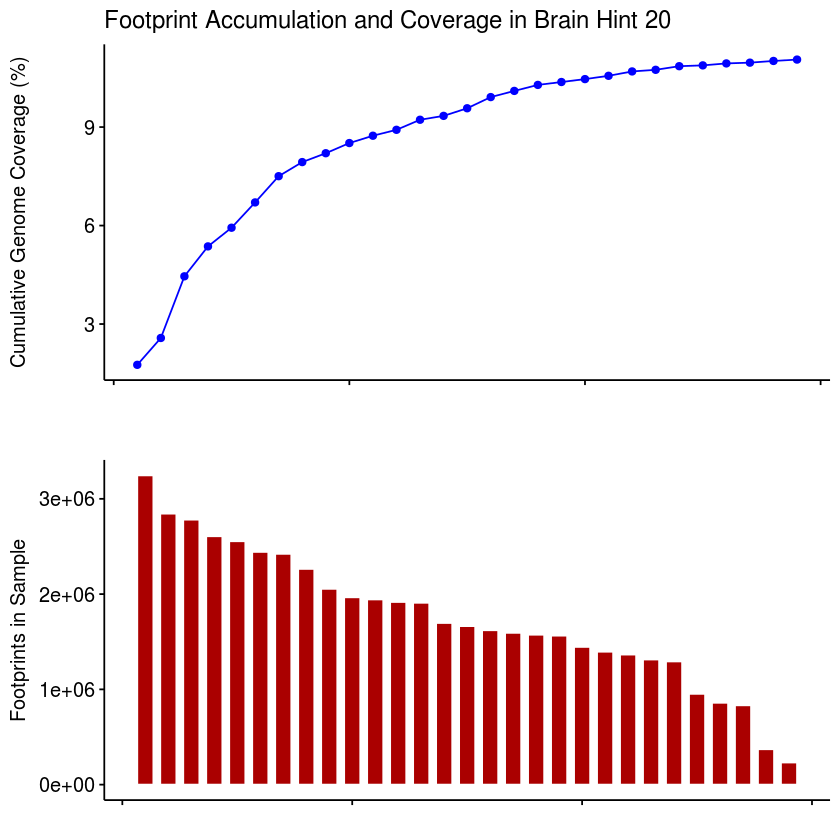

In [110]:
# Try plotting it
cov.plot <- final.df %>%
                ggline(x = "Idx",
                       y = "Percent.Coverage",
                       xlab = "",
                       ylab = "Cumulative Genome Coverage (%)",
                       color = "blue",
#          palette = "jco",
                       main = "Footprint Accumulation and Coverage in Brain Hint 20"
                      ) + rremove("x.text")

fp.plot <- final.df %>%
               ggbarplot(x = "Idx",
               y = "Hits",
               xlab = "",
               ylab = "Footprints in Sample",
               color = "white",
               fill = "#AA0000",
               main = ""
                        ) + rremove("x.text")

ggarrange(cov.plot, fp.plot, nrow = 2, align = "v")

In [111]:
save(final.df, file = "./cumulativeCoverageAndFootprints.Rdata")

In [218]:
# Grab a nice palette
darkcols <- brewer.pal(8, "Accent")

fp.plot <- final.df %>%
               ggbarplot(x = "Idx",
                         y = "Hits",
                         xlab = "Sample Number",
                         ylab = "Footprints in Sample",
                         color = "darkgray",
                         fill = "lightblue",
                         main = "") + 
#rremove("x.text") + 
geom_line(aes(x = Idx, y = Percent.Coverage*16e4), 
          color = "navyblue", lwd = 1) +
geom_point(aes(x = Idx, y = Percent.Coverage*16e4), 
          color = "navyblue", size = 2) +
scale_y_continuous(sec.axis = sec_axis(~./16e4, name = "Genome Coverage (%)"))





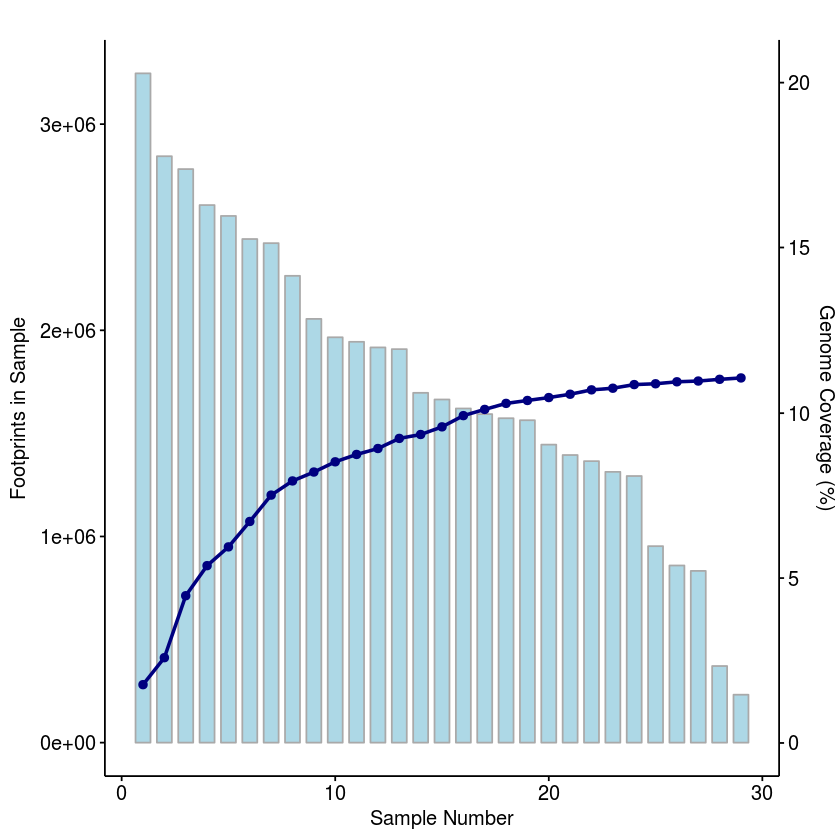

In [219]:
fp.plot

file saved to ./brainHint20FPCoverage.png


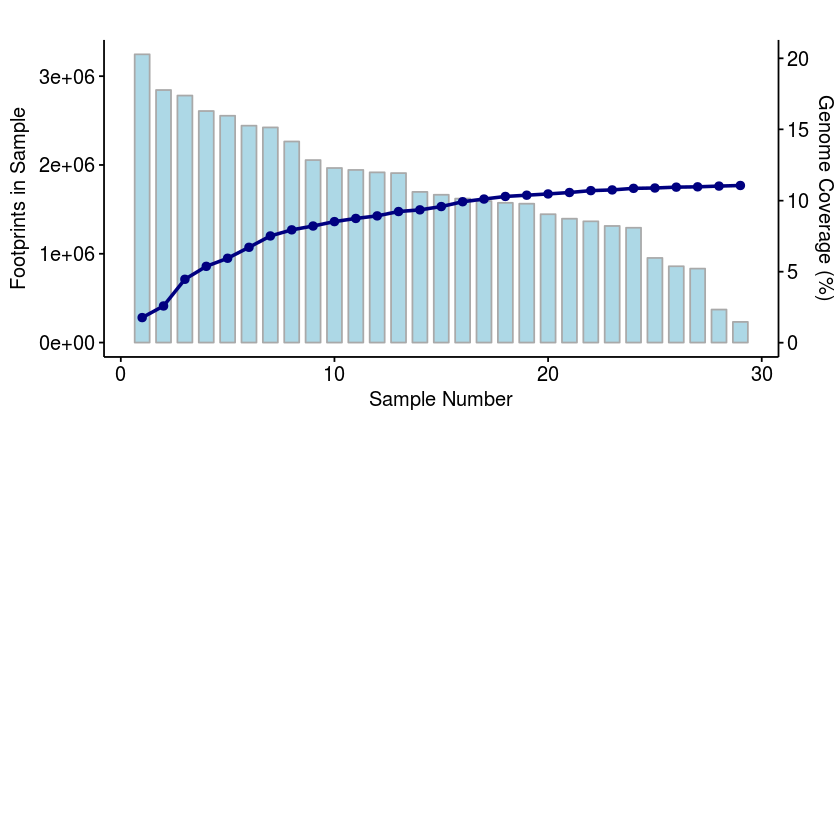

In [248]:
ggarrange(fp.plot, nrow = 2, align = "v")

ggarrange(fp.plot, nrow = 2, align = "v") %>% 
    ggexport(filename = "./brainHint20FPCoverage.png")